<a href="https://colab.research.google.com/github/njsuriya/ML_clf_algorithms/blob/main/iris_knn_clf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from sklearn import datasets
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [5]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df['species']=iris.target
iris_df['names'] = iris_df.species.apply(lambda x: iris.target_names[x])

In [6]:
input_features = iris_df.drop(['species','names'],axis=1)
output_features = iris_df['names']

In [7]:
x_train,x_test,y_train,y_test = train_test_split(input_features,output_features)

In [8]:
len(x_train)

112

In [9]:
len(x_test)

38

In [82]:
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf_model = knn_clf.fit(x_train,y_train)

In [83]:
knn_clf_model_score = knn_clf_model.score(x_test,y_test)
knn_clf_model_score

0.9473684210526315

In [84]:
predicted_species = knn_clf_model.predict(x_test)

In [85]:
knn_clf_model_cm = confusion_matrix(y_test,predicted_species)
knn_clf_model_cm

array([[11,  0,  0],
       [ 0, 12,  0],
       [ 0,  2, 13]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


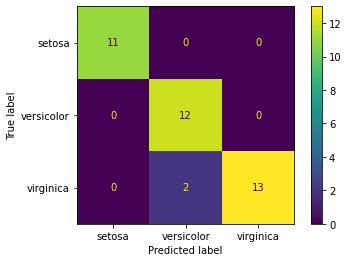

In [86]:
plot_confusion_matrix(knn_clf_model,x_test,y_test)

In [30]:
def train_knnmodel_with_kvalues(k):
  start = time.perf_counter()
  knn_clf = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
  train_time = time.perf_counter() - start
  return train_time,knn_clf

In [73]:
def test_knnmodel(model):
  start = time.perf_counter()
  clf_pred = model.predict(x_test)
  test_time = time.perf_counter() - start
  prediction_score = accuracy_score(y_test,clf_pred)
  #cm_map = ConfusionMatrixDisplay.from_predictions(y_test,clf_pred)
  return test_time,prediction_score,cm_map

In [ ]:
#k_values = [1,2,3,4,5,6,7,8,9,10,15,20,50,100,112]
accu_score = list()
train_time = list()
pred_time = list()
for n_neighbour in range(1,113):
  _train_time, knnmodel = train_knnmodel_with_kvalues(n_neighbour)
  _test_time, score, cm_map =test_knnmodel(knnmodel)
  accu_score.append(score)
  train_time.append(_train_time)
  pred_time.append(_test_time)
  print("KValue:::"+str(n_neighbour)+" Training Time:::"+str(_train_time)+" PredctionTime:::"+str(_test_time)+" Score:::"+str(score))
  #cm_map
  #print('\n')

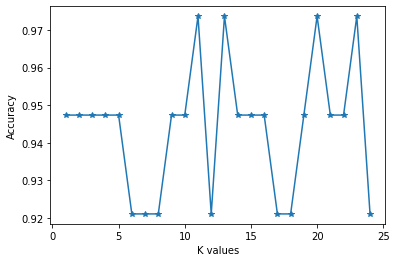

In [80]:
plt.plot(range(1,25),accu_score[:24],marker="*")
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.show()

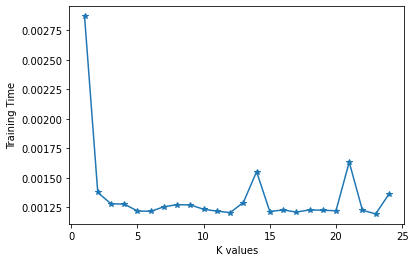

In [81]:
plt.plot(range(1,25),train_time[:24],marker="*")
plt.xlabel("K values")
plt.ylabel("Training Time")
plt.show()

In [92]:
def knn_train_with_njobs(njob):
  start = time.perf_counter()
  knn_clf = KNeighborsClassifier(n_neighbors=10,n_jobs=njob)
  knn_clf_model = knn_clf.fit(x_train,y_train)
  train_time = time.perf_counter() - start
  return train_time,knn_clf

In [93]:
def test_knnmodel(model):
  start = time.perf_counter()
  clf_pred = model.predict(x_test)
  test_time = time.perf_counter() - start
  prediction_score = accuracy_score(y_test,clf_pred)
  #cm_map = ConfusionMatrixDisplay.from_predictions(y_test,clf_pred)
  return test_time,prediction_score,cm_map

In [ ]:
#Jobs need to choose based on the no of CPU-core inside the machine 

import os
os = os.cpu_count()
_train_time = list()
_pred_time = list()
jobs = range(1,50)
for n_job in jobs:
  train_time,knn_clf = knn_train_with_njobs(n_job)
  test_time,prediction_score,cm_map = test_knnmodel(knn_clf)
  _pred_time.append(test_time)
  _train_time.append(train_time)
  print("nJob:::"+str(n_job)+" Training Time:::"+str(train_time)+" PredctionTime:::"+str(test_time)+" Score:::"+str(prediction_score))

<function matplotlib.pyplot.show(*args, **kw)>

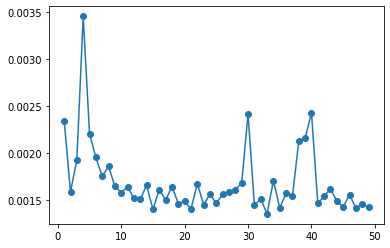

In [108]:
plt.plot(jobs,_train_time,marker="o")
plt.show